In [1]:
import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
# Reading in graph 
G0 = nx.read_weighted_edgelist("bakers_yeast.txt",comments="#",nodetype=str)

In [4]:
print("Number of nodes:", G0.number_of_nodes())
print("Number of edges:", G0.number_of_edges())

Number of nodes: 6394
Number of edges: 994296


In [3]:
# Deleting edges that don't meet threshold score
threshold_score = 700
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])



In [4]:
# Reading in essential proteins file
df = pd.read_csv("essential_proteins.csv", header=None)
essential_proteins = df[1].values

# Deleting essential proteins
for protein in essential_proteins:
  str = "4932." + protein
  if str in G0.nodes and str != "4932.YJL034W":
    G0.remove_node(str)

print("Number of nodes:", G0.number_of_nodes())
print("Number of edges:", G0.number_of_edges())

Number of nodes: 5099
Number of edges: 53447


List of proteins and their yeast homologs:

1. CPS1 - homolog: CPA2(YJR109C)
2. AGPAT2 - homolog: SCL1(YDL052C)
3. LAL - homolog: TGL1(YKL140W), YEH1(YLL012W)
4. FATP5 - homolog: FAT1(YBR041W)
5. JNK1 - homolog: HOG1(YLR113W)
6. GRP78/*HSPA5 - homolog: KAR2(YJL034W)
7. CPS1 - homolog: URA2(YJL130C)

First we use modularity algorithms to find communities.

Notes:
- Naive greedy has a time complexity of O(n^{4}), so very slow (but easy to understand). Too slow, so we won't use it.
- Normal greedy uses Clauset-Newman-Moore maximisation

In [7]:
mod = nx.algorithms.community.greedy_modularity_communities(G0)

In [8]:
print("Number of communities: {}".format(len(mod)))
size_of_communities = [len(community) for community in mod]
print("Sizes of communities: ", size_of_communities)

Number of communities: 464
Sizes of communities:  [1581, 1457, 718, 411, 136, 77, 76, 46, 27, 17, 10, 9, 9, 9, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

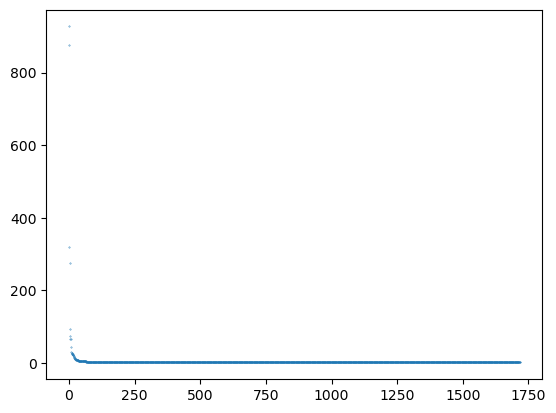

In [8]:
plt.scatter(range(len(size_of_communities)), size_of_communities, s=0.1)

Too many communities (~2000). Some communities are single nodes (which makes the concept useless). We aim to get less communities or only consider the largest communities.

In [1]:
# Finding which of the homologs we are interested in actualy exist in the network
homologs = ["4932.YJR109C", "4932.YDL052C", "4932.YKL140W", "4932.YLL012W", "4932.YBR041W", "4932.YLR113W", "4932.YJL130C", "4932.YJL034W"]
homologs_in_graph = []

for homolog in homologs:
  if homolog in list(G0.nodes):
    homologs_in_graph.append(homolog)

homologs = homologs_in_graph

NameError: name 'G0' is not defined

In [8]:
# Optional!!!

# Deleting all nodes in communities of length <= 10
G = copy.deepcopy(G0)
for community in mod:
  if len(community) < 10:
    for node in community:
      G.remove_node(node)

print(G.number_of_nodes())

3078


In [10]:
# Identifying what communities each homolog is in for greedy community detection
indexes = []
for homolog in homologs:
  i = 0
  for community in mod:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

[('4932.YJR109C', 0), ('4932.YDL052C', 0), ('4932.YKL140W', 0), ('4932.YLL012W', 0), ('4932.YBR041W', 0), ('4932.YLR113W', 1), ('4932.YJL130C', 0), ('4932.YJL034W', 1)]


In [25]:
# Attempting to plot network with communities
from netgraph import Graph
import random

# getting number of communities above threshold size
threshold_size = 10
n = 0
for community in mod:
  if len(community) >= threshold_size:
    n += 1

# Making colour map for all of our important communities, making the other smaller ones black
community_color_map = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(n)]

In [26]:
# Assigning node colours
node_color = {}

node_to_community = {}

# Looping through all nodes
for node in G.nodes:
  
  # Finding what community it is part of
  i = 0
  for community in mod:
    if node in community:
      break
    i += 1
  node_to_community[node] = i
  node_color[node] = community_color_map[i]

In [27]:
Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()


KeyboardInterrupt: 

Drawing individual communities and our yeast homologs

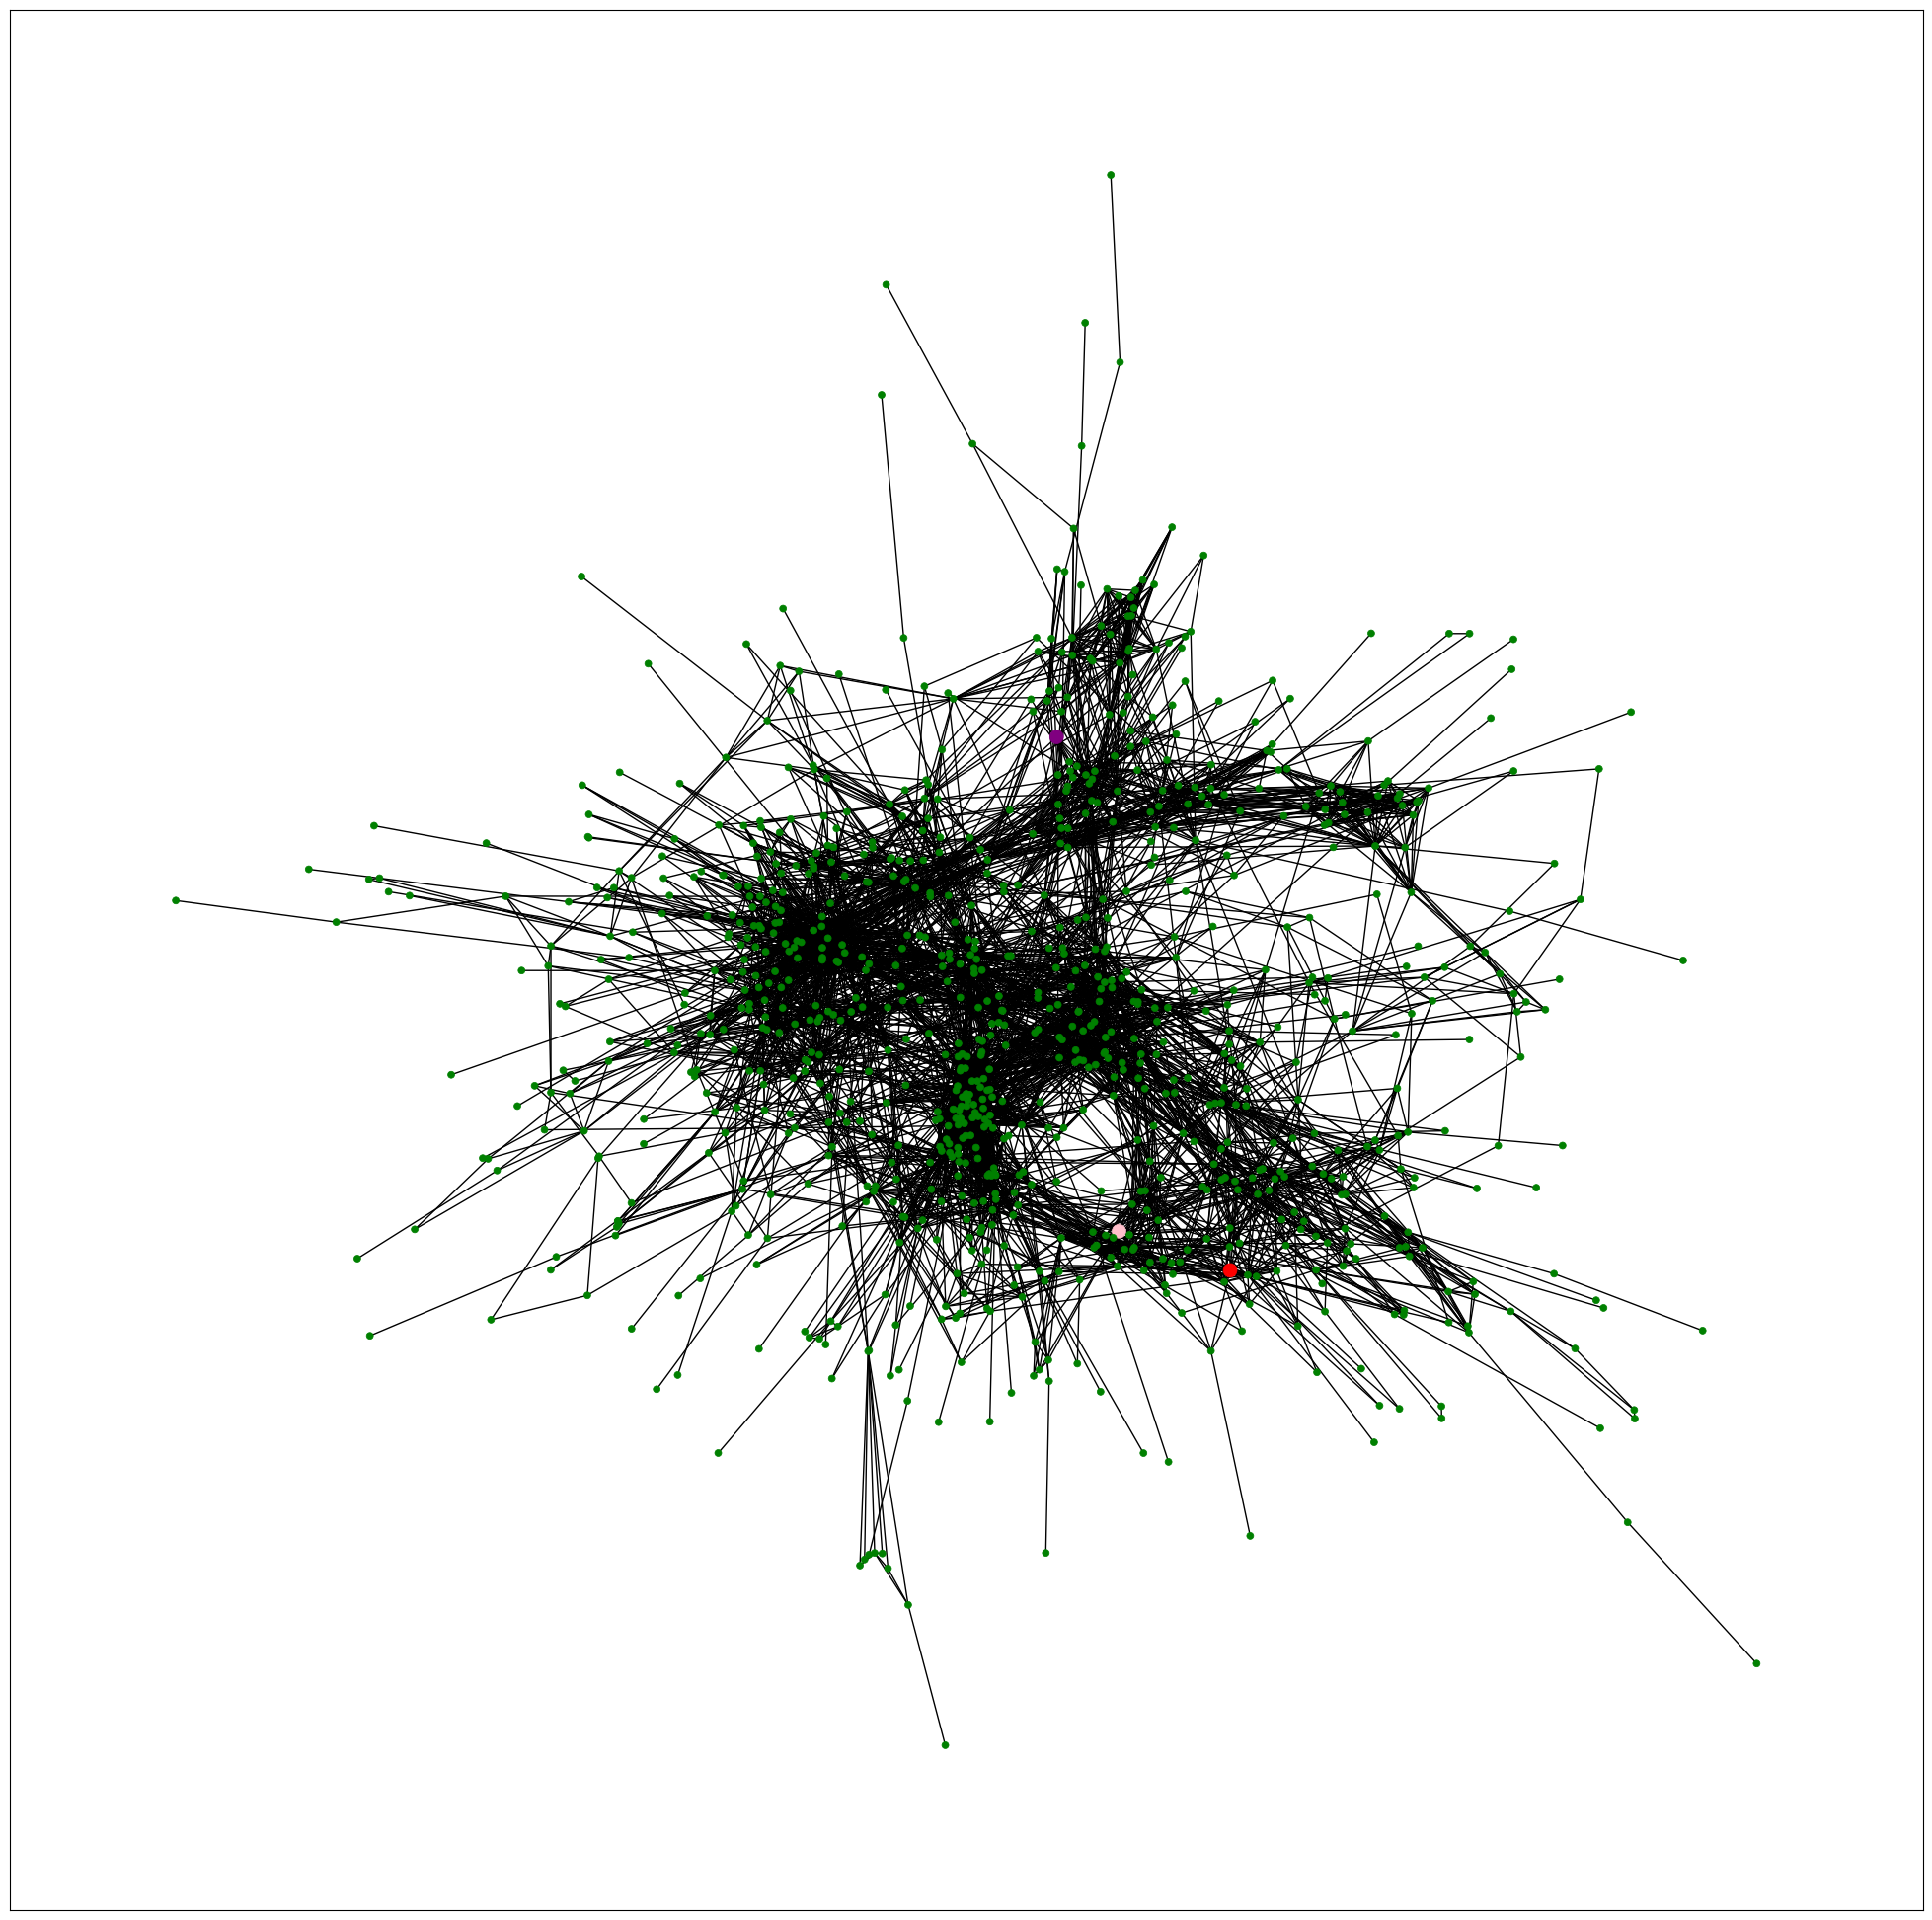

In [28]:
# Community 0 with YBR041W, YJR109C and YJL130C
sub = G0.subgraph(list(mod[0]))

color_map = []

for node in mod[0]:
  if node == "4932.YBR041W":
    color_map.append("purple")
  elif node == "4932.YJR109C":
    color_map.append("red")
  elif node == "4932.YJL130C":
    color_map.append("pink")
  else:
    color_map.append("green")

node_size_map = [100 if node == "4932.YBR041W" or node == "4932.YJR109C" or node == "4932.YJL130C" else 25 for node in mod[0]]  


plt.figure(3,figsize=(25,25))
nx.draw_networkx(sub, linewidths=0.5, with_labels=False, node_color=color_map, node_size = node_size_map)
plt.show()

Finding central proteins within this community

In [29]:
# Betweenness centrality
centrality_dict = nx.algorithms.centrality.betweenness_centrality(G0.subgraph(mod[0]))

In [30]:
centrality_pairs = sorted(list(centrality_dict.items()), key=lambda x: x[1], reverse=True)
print(list(zip(*(centrality_pairs[:10]))))

[('4932.YMR250W', '4932.YKL106W', '4932.YGR088W', '4932.YJR121W', '4932.YMR186W', '4932.YBR221C', '4932.YOR065W', '4932.YGR248W', '4932.YLR304C', '4932.YPL262W'), (0.06638398306191524, 0.06621223865256601, 0.0584665266511122, 0.05706202323314015, 0.048975805666125694, 0.042021122970530296, 0.03858524446570491, 0.03572064658220407, 0.034550491844234026, 0.03444824179850701)]


Louvain

In [1]:
louvain = nx.algorithms.community.louvain_communities(G0)
louvain.sort(key=len, reverse=True)

print("Number of communities: {}".format(len(louvain)))
size_of_communities = [len(community) for community in louvain]
print("Sizes of communities: ", size_of_communities)

indexes = []
for homolog in homologs:
  i = 0
  for community in louvain:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

NameError: name 'nx' is not defined

Girvan-Newman

In [13]:
gn = nx.algorithms.community.girvan_newman(G0)

print("Number of communities: {}".format(len(louvain)))
size_of_communities = [len(community) for community in louvain]
print("Sizes of communities: ", size_of_communities)
  
indexes = []
for homolog in homologs:
  i = 0
  for community in mod:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

Number of communities: 455
Sizes of communities:  [789, 537, 413, 413, 391, 307, 257, 242, 232, 207, 198, 197, 160, 123, 94, 69, 11, 7, 5, 4, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Markov Clustering Algorithm

In [5]:
import markov_clustering as mc

In [6]:
matrix = nx.to_scipy_sparse_matrix(G0)
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)

C:\Users\amool\AppData\Local\Temp\ipykernel_8732\767935266.py:1: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  matrix = nx.to_scipy_sparse_matrix(G0)


In [23]:
markov = copy.deepcopy(clusters)
l = list(G0.nodes)

# Iterate through clusters and put in original names of proteins
for i in range(len(clusters)):
  markov[i] = list(markov[i])
  for j in range(len(clusters[i])):
    markov[i][j] = l[markov[i][j]]

markov.sort(key=len, reverse=True)

In [28]:
print("Number of communities: {}".format(len(markov)))
size_of_communities = [len(community) for community in markov]
print("Sizes of communities: ", size_of_communities)

indexes = []
for homolog in homologs:
  i = 0
  for community in markov:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

Number of communities: 1250
Sizes of communities:  [156, 145, 131, 122, 116, 70, 63, 50, 50, 44, 41, 40, 38, 37, 35, 34, 33, 32, 32, 30, 30, 29, 29, 28, 28, 27, 27, 27, 27, 27, 25, 24, 23, 23, 23, 23, 23, 22, 22, 22, 21, 20, 20, 20, 20, 19, 19, 19, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [ ]:
# Attempting to plot network with communities
from netgraph import Graph
import random

# getting number of communities above threshold size
threshold_size = 10
n = 0
for community in mod:
  if len(community) >= threshold_size:
    n += 1

# Making colour map for all of our important communities, making the other smaller ones black
community_color_map = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(n)]